In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Flights

In [3]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv
Saving flight_price.xlsx to flight_price (1).xlsx


In [12]:
#Q1 . Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [7]:
flight_price=pd.read_excel("/content/flight_price.xlsx")

In [9]:
flight_price.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
flight_price.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
flight_price.shape

(10683, 11)

In [ ]:
#Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.


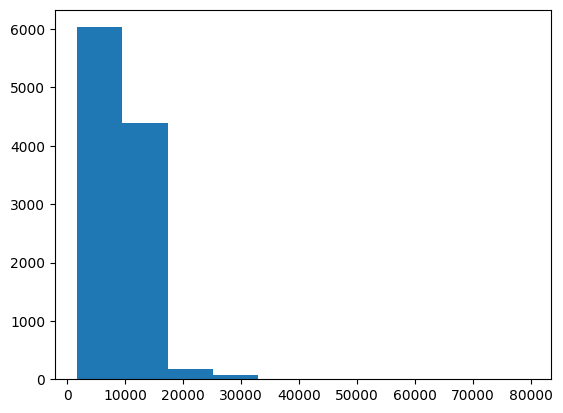

In [14]:
plt.hist(flight_price['Price'])
plt.show()

In [ ]:
#Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [15]:
max_value = flight_price['Price'].max()
min_value = flight_price['Price'].min()
range_value = max_value - min_value

print('max_value: ', max_value)
print('min_value: ', min_value)
print('range:     ', range_value)


max_value:  79512
min_value:  1759
range:      77753


In [ ]:
#Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

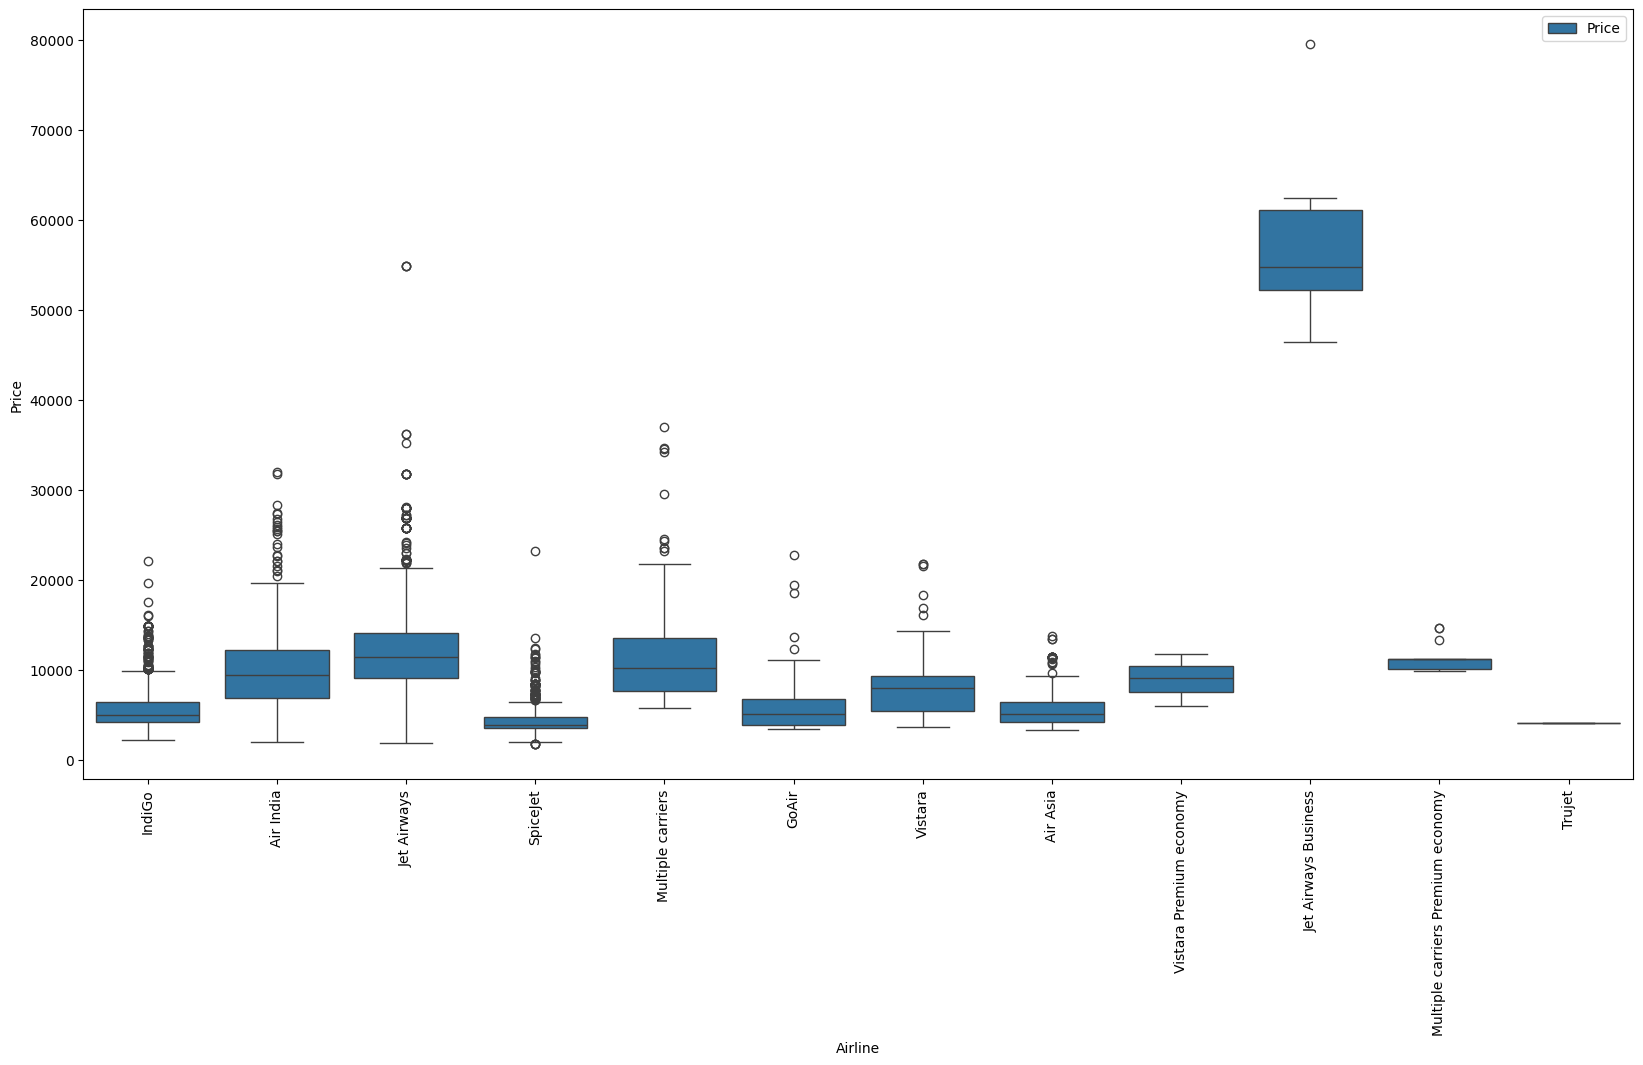

In [17]:
counts = flight_price['Price']
data = pd.DataFrame(counts.groupby(flight_price['Airline']))

plt.figure(figsize=(20, 10))
sns.boxplot(x=flight_price['Airline'], y=flight_price['Price'])
plt.xticks(rotation=90)
plt.legend(labels=['Price'])
plt.show()

In [ ]:
#Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

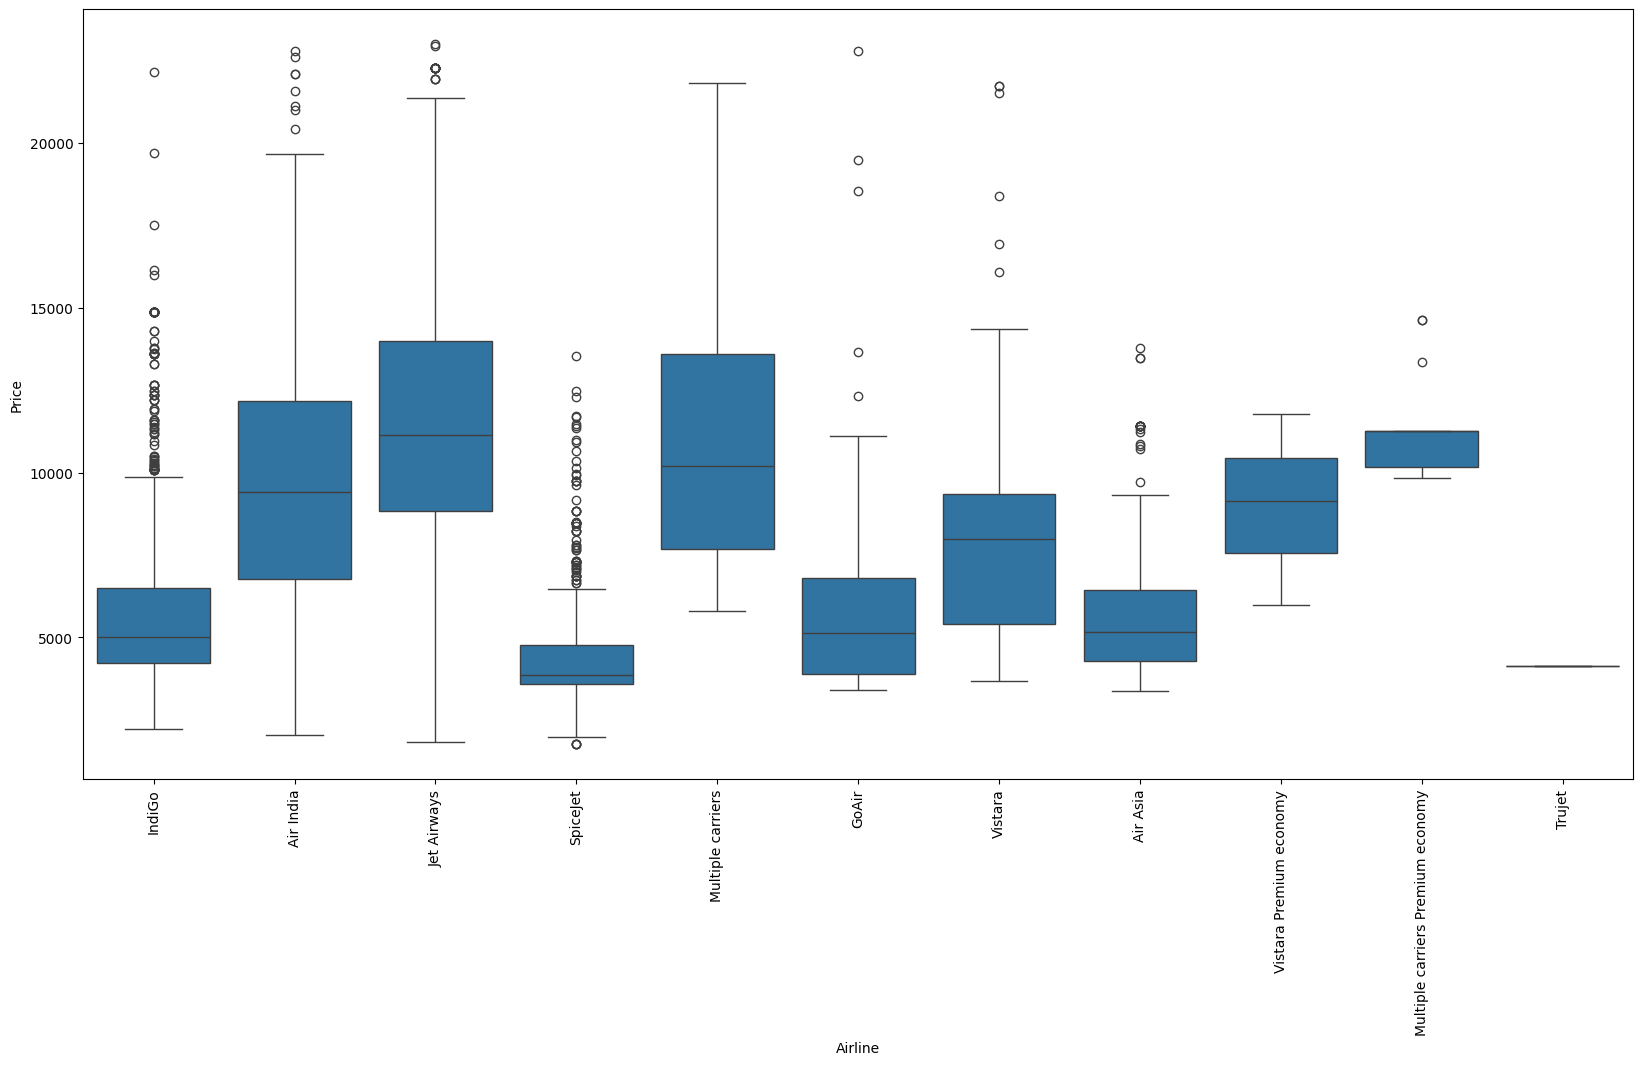

              Price
count  10589.000000
mean    8897.661724
std     4069.120294
min     1759.000000
25%     5228.000000
50%     8355.000000
75%    12312.000000
max    23001.000000
Price    8355.0
dtype: float64
Price    8372.0
dtype: float64
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


<ipython-input-18-b14b0235cfeb>:19: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data_no_outliers.median())
<ipython-input-18-b14b0235cfeb>:20: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(flight_price.median())


In [18]:
Q1 = flight_price['Price'].quantile(0.25)
Q3 = flight_price['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = flight_price[(flight_price['Price'] >= lower_bound) & (flight_price['Price'] <= upper_bound)]

counts1 = data_no_outliers['Price']
data1 = pd.DataFrame(counts1.groupby(data_no_outliers['Airline']))
plt.figure(figsize=(20, 10))
sns.boxplot(x=data_no_outliers['Airline'], y=data_no_outliers['Price'])
plt.xticks(rotation=90)
plt.show()

print(data_no_outliers.describe())
print(data_no_outliers.median())
print(flight_price.median())
print(flight_price.describe())


In [ ]:
#Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

Average prices grouped by Airline:
Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64


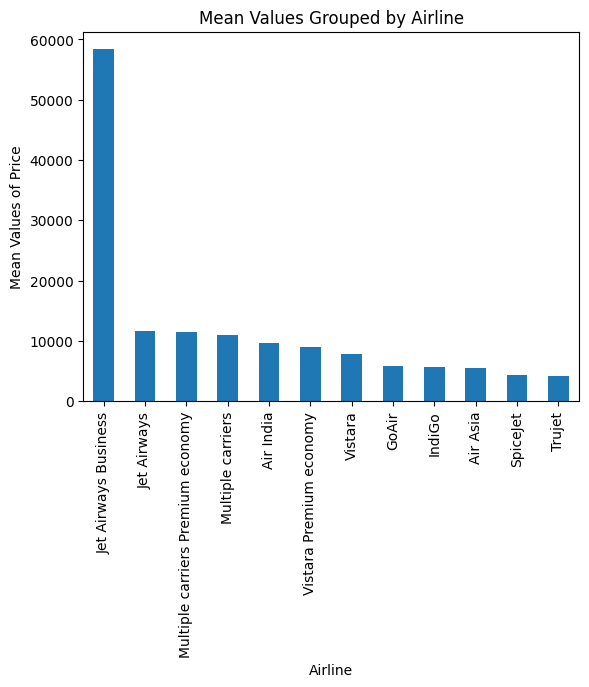


Average prices grouped by Destination:
Destination
New Delhi    11917.716738
Cochin       10539.439057
Banglore      9158.389411
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
Name: Price, dtype: float64


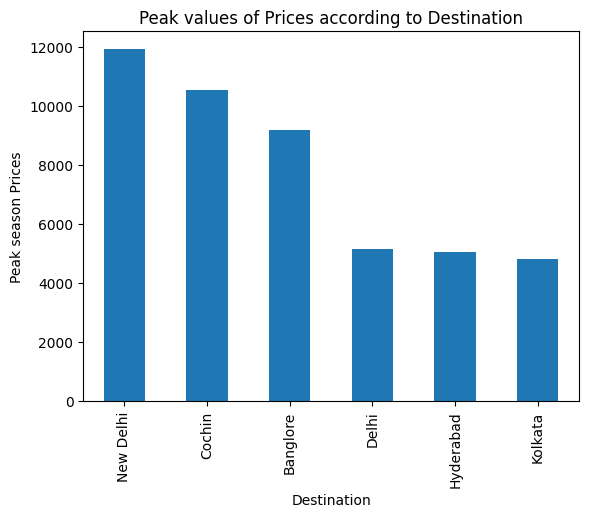


Average prices grouped by Month:
month
03    10673.205580
05     9127.247548
06     8828.796134
04     5770.847081
Name: Price, dtype: float64


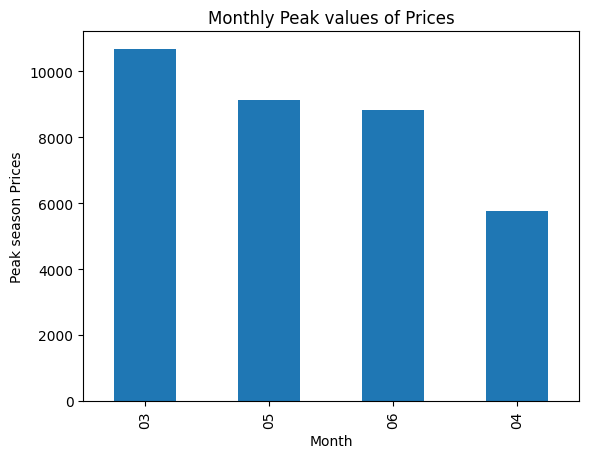

In [20]:
import matplotlib.pyplot as plt

flight_price_sorted = flight_price.sort_values(by='Price', ascending=False)

average = flight_price.groupby('Airline')['Price'].mean()
average_sorted = average.sort_values(ascending=False)
print("Average prices grouped by Airline:")
print(average_sorted)

average_sorted.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Mean Values of Price')
plt.title('Mean Values Grouped by Airline')
plt.show()

average_by_dest = flight_price.groupby('Destination')['Price'].mean()
average_by_dest_sorted = average_by_dest.sort_values(ascending=False)
print("\nAverage prices grouped by Destination:")
print(average_by_dest_sorted)

average_by_dest_sorted.plot(kind='bar')
plt.xlabel('Destination')
plt.ylabel('Peak season Prices')
plt.title('Peak values of Prices according to Destination')
plt.show()

flight_price['date'] = flight_price['Date_of_Journey'].str.split('/').str[0]
flight_price['month'] = flight_price['Date_of_Journey'].str.split('/').str[1]
flight_price['year'] = flight_price['Date_of_Journey'].str.split('/').str[2]
flight_price.head()

average_by_date = flight_price.groupby('month')['Price'].mean()
average_by_date_sorted = average_by_date.sort_values(ascending=False)
print("\nAverage prices grouped by Month:")
print(average_by_date_sorted)

average_by_date_sorted.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()


In [ ]:
#Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


Head of Price data:
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price date  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   24   
1    05:50         13:15   7h 25m     2 stops         No info   7662    1   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882    9   
3    18:05         23:30   5h 25m      1 stop         No info   6218   12   
4    16:50         21:35   4h 45m      1 stop         No info  13302   01   

  month  year  
0    03  2019  
1    05  2

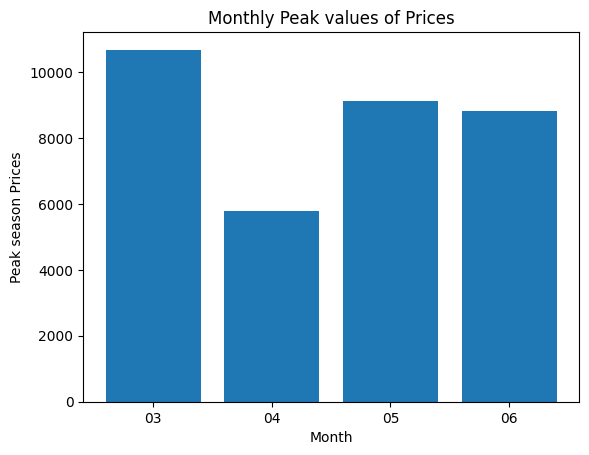


Average prices grouped by Airline:
                              Airline         Price
0                Jet Airways Business  58358.666667
1                         Jet Airways  11643.923357
2   Multiple carriers Premium economy  11418.846154
3                   Multiple carriers  10902.678094
4                           Air India   9611.210616
5             Vistara Premium economy   8962.333333
6                             Vistara   7796.348643
7                               GoAir   5861.056701
8                              IndiGo   5673.682903
9                            Air Asia   5590.260188
10                           SpiceJet   4338.284841
11                             Trujet   4140.000000


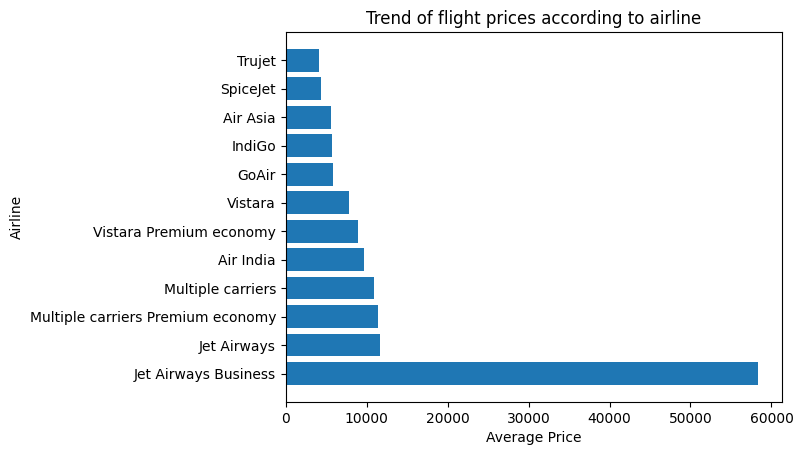


Average flight prices grouped by number of stops:
Total_Stops
non-stop     5024.900315
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
Name: Price, dtype: float64


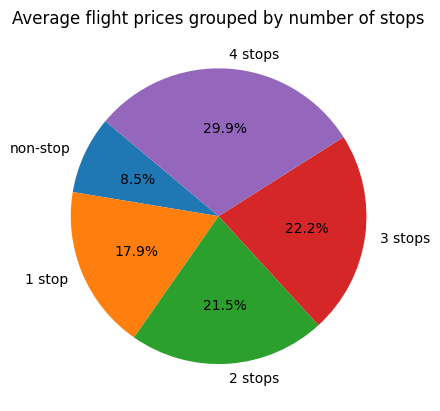

In [21]:
print("Head of Price data:")
print(flight_price.head())

average_by_date = flight_price.groupby('month')['Price'].mean()
average4 = pd.DataFrame(average_by_date.sort_values(ascending=False))
average4 = average4.reset_index()
average4 = average4.sort_values(by='month')

print("\nAverage prices grouped by Month:")
print(average4)

plt.bar(average4['month'], average4['Price'])
plt.xlabel('Month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()

average5 = flight_price.groupby('Airline')['Price'].mean()
average6 = average5.sort_values(ascending=False)
average6 = pd.DataFrame(average6)
average6 = average6.reset_index()

print("\nAverage prices grouped by Airline:")
print(average6)

plt.barh(average6['Airline'], average6['Price'])
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.title('Trend of flight prices according to airline')
plt.show()

stops = flight_price.groupby('Total_Stops')['Price'].mean()
avg_stops = stops.sort_values(ascending=True)

print("\nAverage flight prices grouped by number of stops:")
print(avg_stops)

plt.pie(avg_stops, labels=avg_stops.index, autopct='%1.1f%%', startangle=140)
plt.title('Average flight prices grouped by number of stops')
plt.show()


In [ ]:
#Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

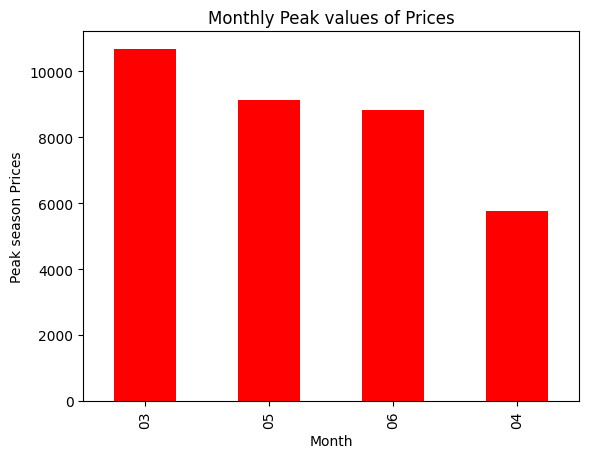

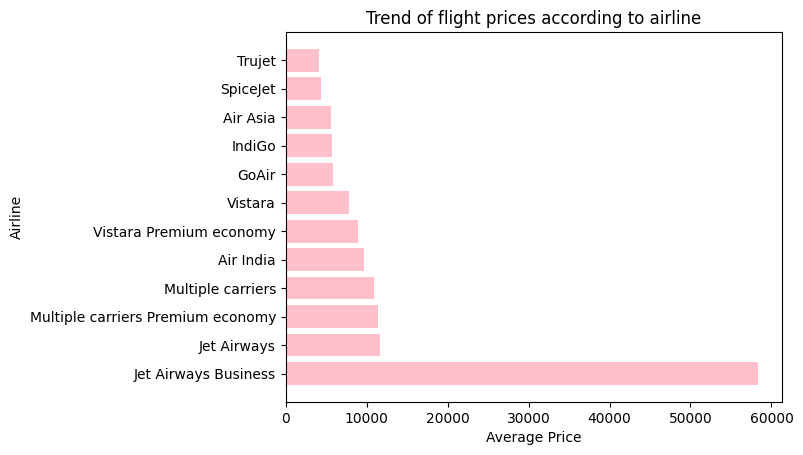

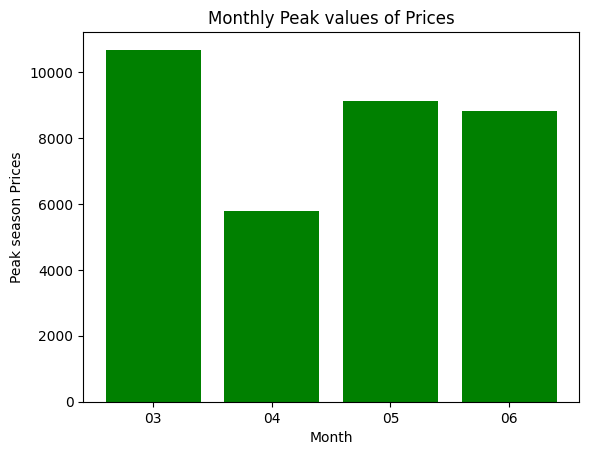

In [22]:
average_by_date_sorted.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()

plt.barh(average6['Airline'], average6['Price'], color='pink')
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.title('Trend of flight prices according to airline')
plt.show()

plt.bar(average4['month'], average4['Price'], color='green')
plt.xlabel('Month')
plt.ylabel('Peak season Prices')
plt.title('Monthly Peak values of Prices')
plt.show()


In [ ]:
# Playstore

In [24]:

df = pd.read_csv('/content/googleplaystore.csv')
df.head()

def convert_size(size):
    if 'M' in size:
        return float(size.replace('M','')) * 1000
    elif 'k' in size:
        return float(size.replace('k',''))
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

df.drop_duplicates(subset=['App'], keep='first', inplace=True)

cols = ['Installs', 'Price']
chars_to_remove = ['+', ',', '$']

for i in cols:
    for j in chars_to_remove:
        df[i] = df[i].str.replace(j, '', regex=False)  # Avoid single-character regex

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
median_installs = df['Installs'].median()
df['Installs'] = df['Installs'].fillna(median_installs)
df['Installs'] = df['Installs'].astype('int')

df['Price'] = df['Price'].str.replace('$', '', regex=False)  # Avoid single-character regex
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
median_price = df['Price'].median()
df['Price'] = df['Price'].fillna(median_price)
df['Price'] = df['Price'].astype('float')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            8432 non-null   float64
 5   Installs        9660 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [ ]:
#Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [25]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            8432 non-null   float64
 5   Installs        9660 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


,Rating,Size,Installs,Price
count,8197.000000,8432.000000,9.660000e+03,9660.000000
mean,4.175052,20395.289315,7.776712e+06,1.099185
std,0.561026,21827.542435,5.375555e+07,16.851283
min,1.000000,8.500000,0.000000e+00,0.000000
25%,4.000000,4600.000000,1.000000e+03,0.000000
50%,4.300000,12000.000000,1.000000e+05,0.000000
75%,4.500000,28000.000000,1.000000e+06,0.000000
max,19.000000,100000.000000,1.000000e+09,400.000000


In [26]:
#Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

Missing values count:
App                  0
Category             0
Rating            1463
Reviews              0
Size              1228
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


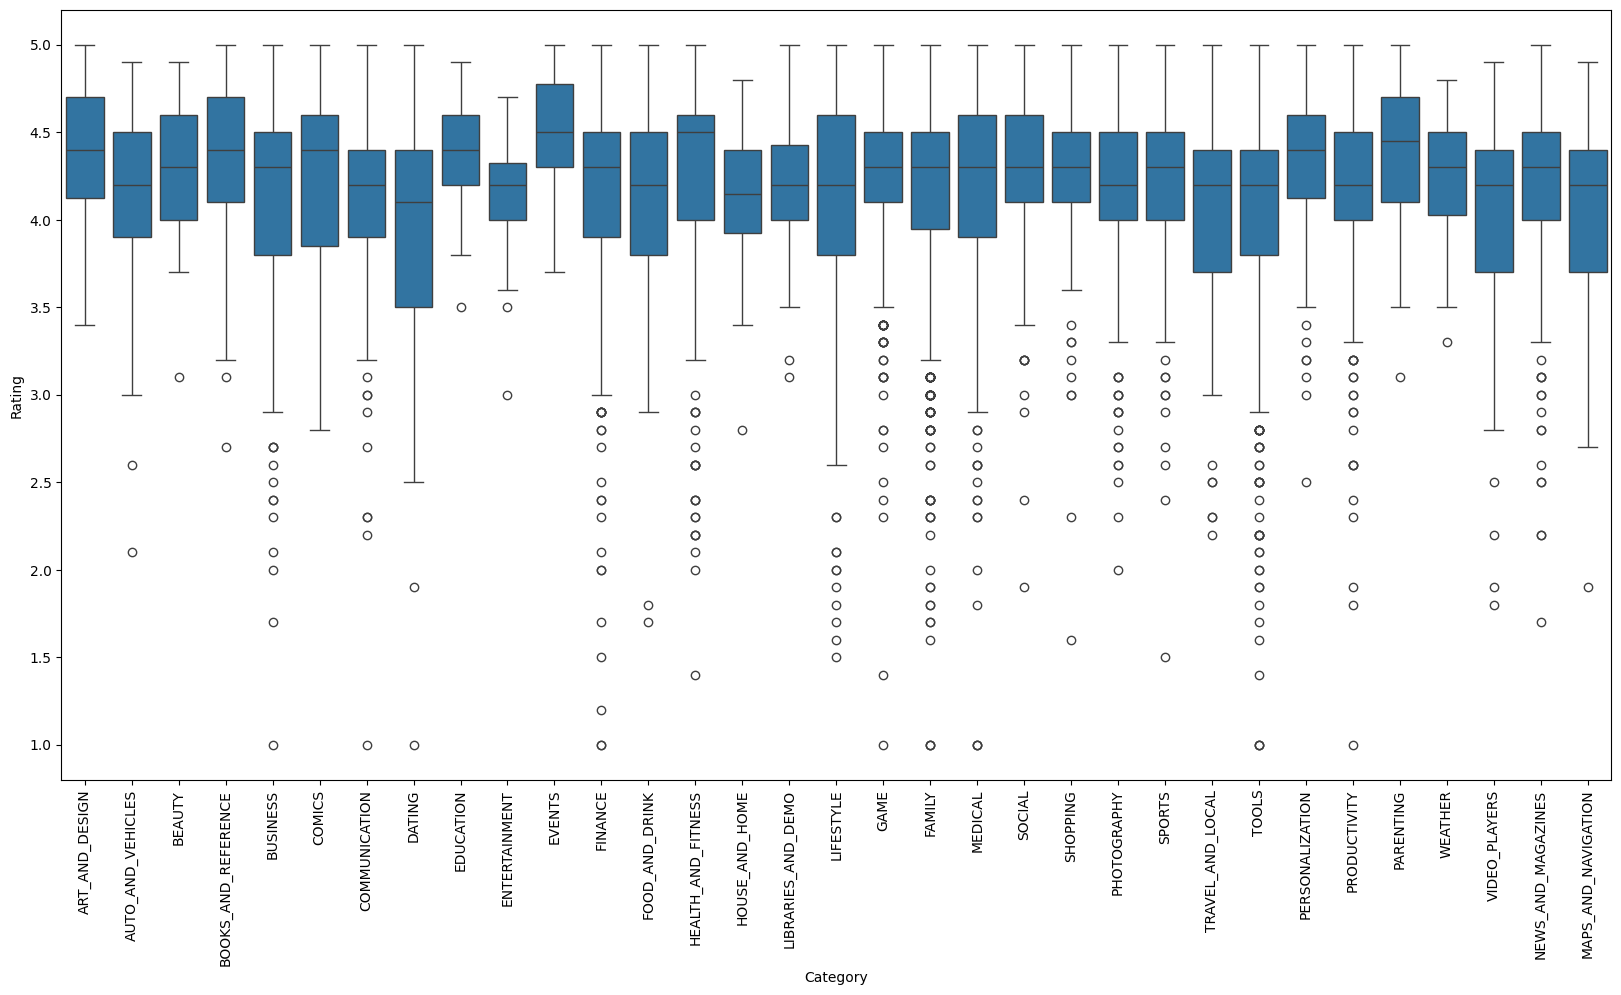

In [27]:
df.drop_duplicates(subset=['App'], keep='first', inplace=True)

print("Missing values count:")
print(df.isnull().sum())

df.dropna(inplace=True)

plt.figure(figsize=(20, 10))
sns.boxplot(x=df['Category'], y=df['Rating'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [42]:
df['Reviews'].unique()


array([   159,    967,  87510, ...,    603,   1195, 398307])

In [45]:
df['Reviews']=df['Reviews'].astype('int')

Number of non-numeric entries in 'Reviews' column: 0


In [46]:
df[~df['Reviews'].str.isnumeric()]

AttributeError: Can only use .str accessor with string values!

In [41]:
df['Reviews']=df['Reviews'].str.replace('3.0M','3000000')

AttributeError: Can only use .str accessor with string values!

In [ ]:
df['Reviews'].str.isnumeric().sum()

In [ ]:
df['Reviews']=df['Reviews'].astype('int')

In [ ]:
df.drop(index=10472,inplace=True)

In [ ]:
#Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

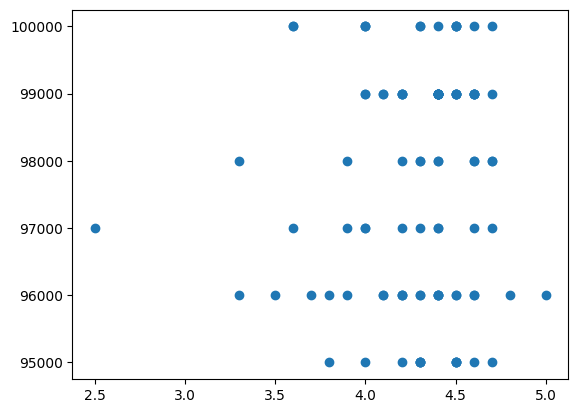

In [47]:
df=df.sort_values(by='Size',ascending=False).head(100)
plt.scatter(x=df['Rating'],y=df['Size'])

In [ ]:
#Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'AI Benchmark'),
  Text(1, 0, 'AP Art History Flashcards'),
  Text(2, 0, 'AT&T U-verse'),
  Text(3, 0, 'Angry Birds Blast'),
  Text(4, 0, 'Angry Birds Classic'),
  Text(5, 0, 'Angry Birds POP Bubble Shooter'),
  Text(6, 0, 'Arena of Valor: 5v5 Arena Game'),
  Text(7, 0, 'BK Dinos'),
  Text(8, 0, 'BOO! - Next Generation Messenger'),
  Text(9, 0, 'BZ Zombie VR'),
  Text(10, 0, 'Bejeweled Blitz'),
  Text(11, 0, 'Binaural Beats Meditation'),
  Text(12, 0, 'Boom Beach'),
  Text(13, 0, 'Car Crash III Beam DH Real Damage Simulator 2018'),
  Text(14, 0, 'Chakra Cleansing'),
  Text(15, 0, 'Chapters: Interactive Stories'),
  Text(16, 0, 'Clash Royale'),
  Text(17, 0, 'Clash of Clans'),
  Text(18, 0, 'Clash of Kings : The King Of Fighters version'),
  Text(19, 0, 'DC All Access'),
  Text(20, 0, 'DC Super Hero Girls™

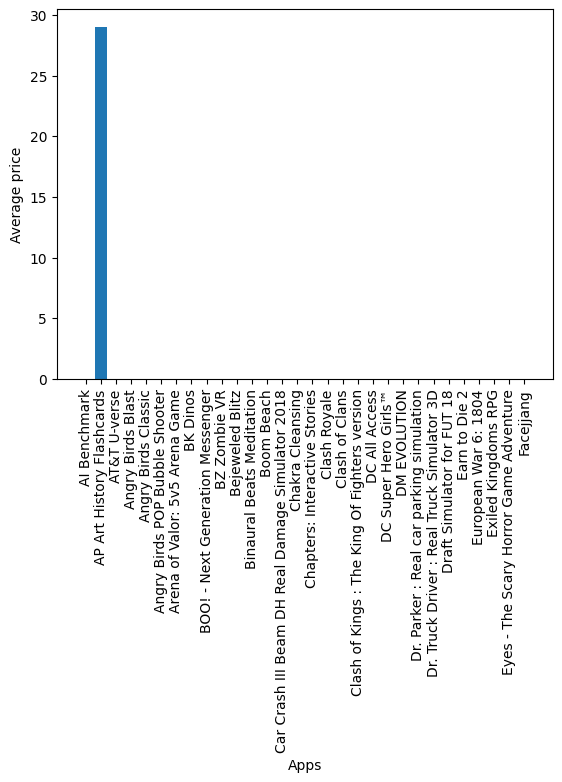

In [48]:
df['Price']=df['Price'].astype('int')
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
avg_price=df.groupby('App')['Price'].mean().head(30)
avg_price
avg_price=df.groupby('App')['Price'].mean().head(30)
plt.bar(avg_price.index,avg_price.values)
plt.xlabel('Apps')
plt.ylabel('Average price')
plt.xticks(rotation=90)

In [ ]:
#Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

                            App Category  Rating   Reviews      Size  \
1758     Hungry Shark Evolution     GAME     4.5   6074334  100000.0   
1670             Clash of Clans     GAME     4.6  44891723   98000.0   
2007            Jetpack Joyride     GAME     4.4   4638163   96000.0   
5417  Mobile Legends: Bang Bang     GAME     4.4   8219586   99000.0   
1680        Angry Birds Classic     GAME     4.4   5566669   97000.0   
1660               Clash Royale     GAME     4.6  23133508   97000.0   
1709                Score! Hero     GAME     4.6   5418675   96000.0   
1697          My Talking Angela     GAME     4.5   9881829   99000.0   
1781               Trivia Crack     GAME     4.5   6427773   95000.0   
6551                 Boom Beach   FAMILY     4.5   5591653   95000.0   

       Installs  Type  Price Content Rating    Genres    Last Updated  \
1758  100000000  Free      0           Teen    Arcade   July 25, 2018   
1670  100000000  Free      0   Everyone 10+  Strategy   July 

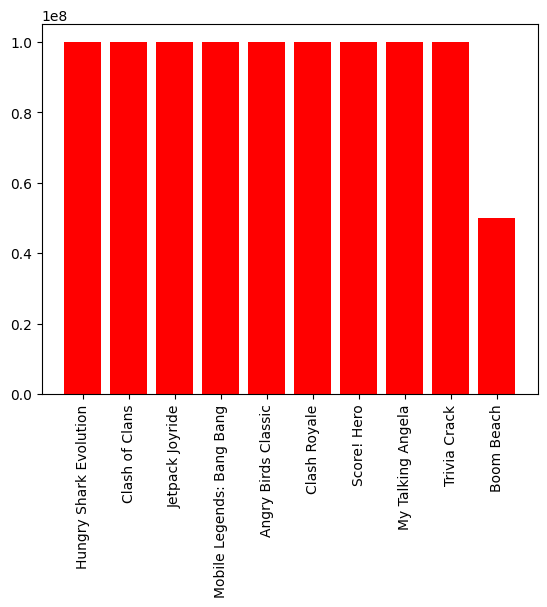

In [51]:
top_apps=df.sort_values(by='Installs',ascending=False).head(10)
print(top_apps)
plt.bar(top_apps['App'],top_apps['Installs'],color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

GAME                  50
FAMILY                30
SPORTS                 3
MEDICAL                3
HEALTH_AND_FITNESS     2
LIBRARIES_AND_DEMO     2
PARENTING              2
FINANCE                1
LIFESTYLE              1
TOOLS                  1
Name: Category, dtype: int64
                                                   App            Category  \
1758                            Hungry Shark Evolution                GAME   
5862                             Miami crime simulator                GAME   
4690                                        Vi Trainer  HEALTH_AND_FITNESS   
8847                        Draft Simulator for FUT 18              SPORTS   
7404                                   SimCity BuildIt              FAMILY   
1565                    Talking Babsy Baby: Baby Games           LIFESTYLE   
2299                              Navi Radiography Pro             MEDICAL   
8409  Car Crash III Beam DH Real Damage Simulator 2018                GAME   
5530               

<Axes: xlabel='App', ylabel='Size'>

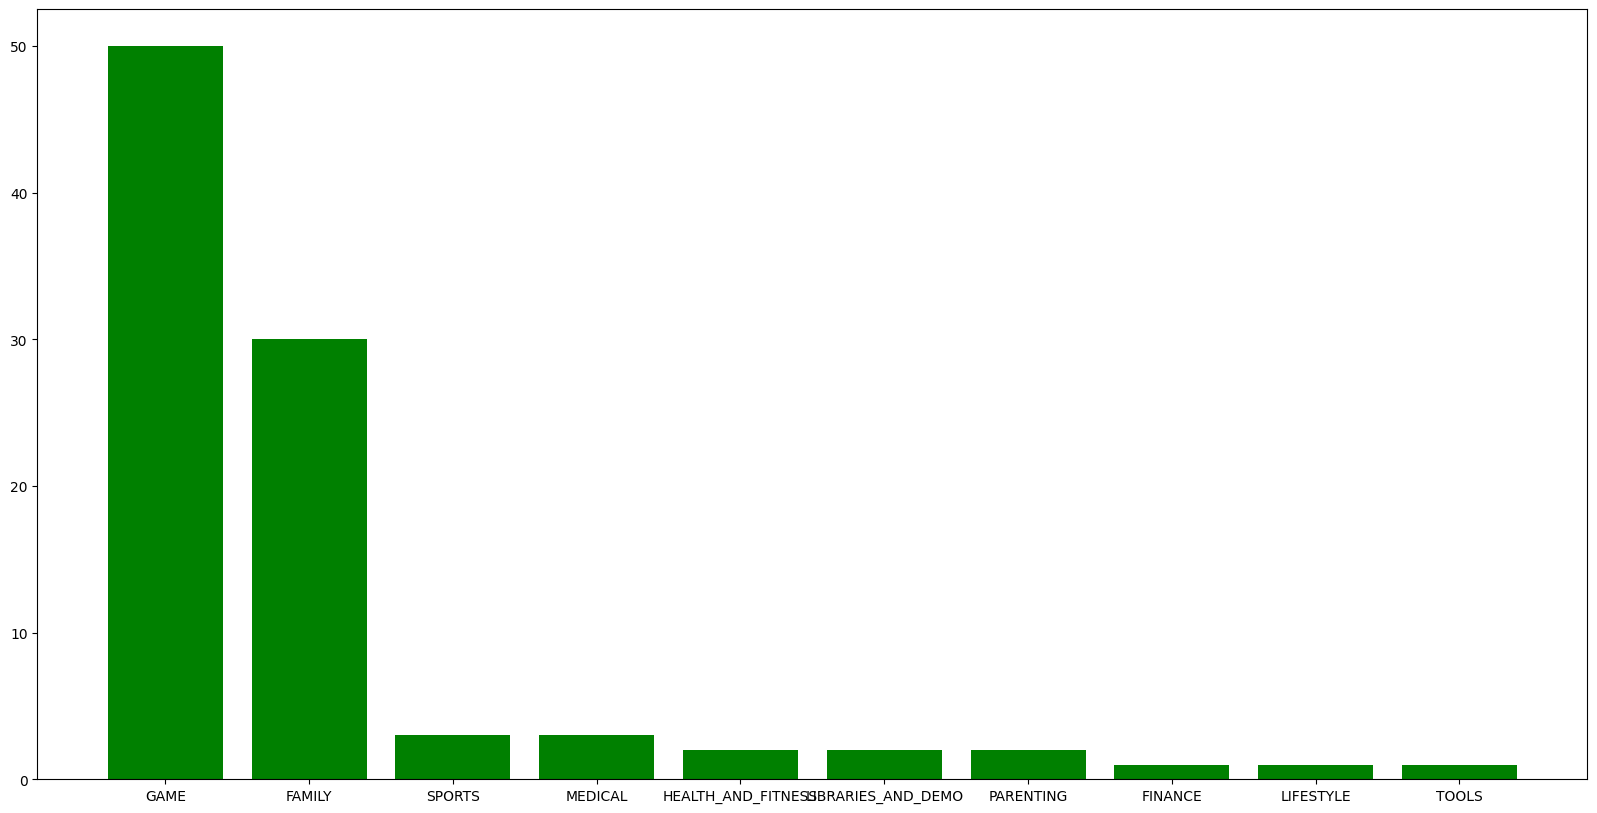

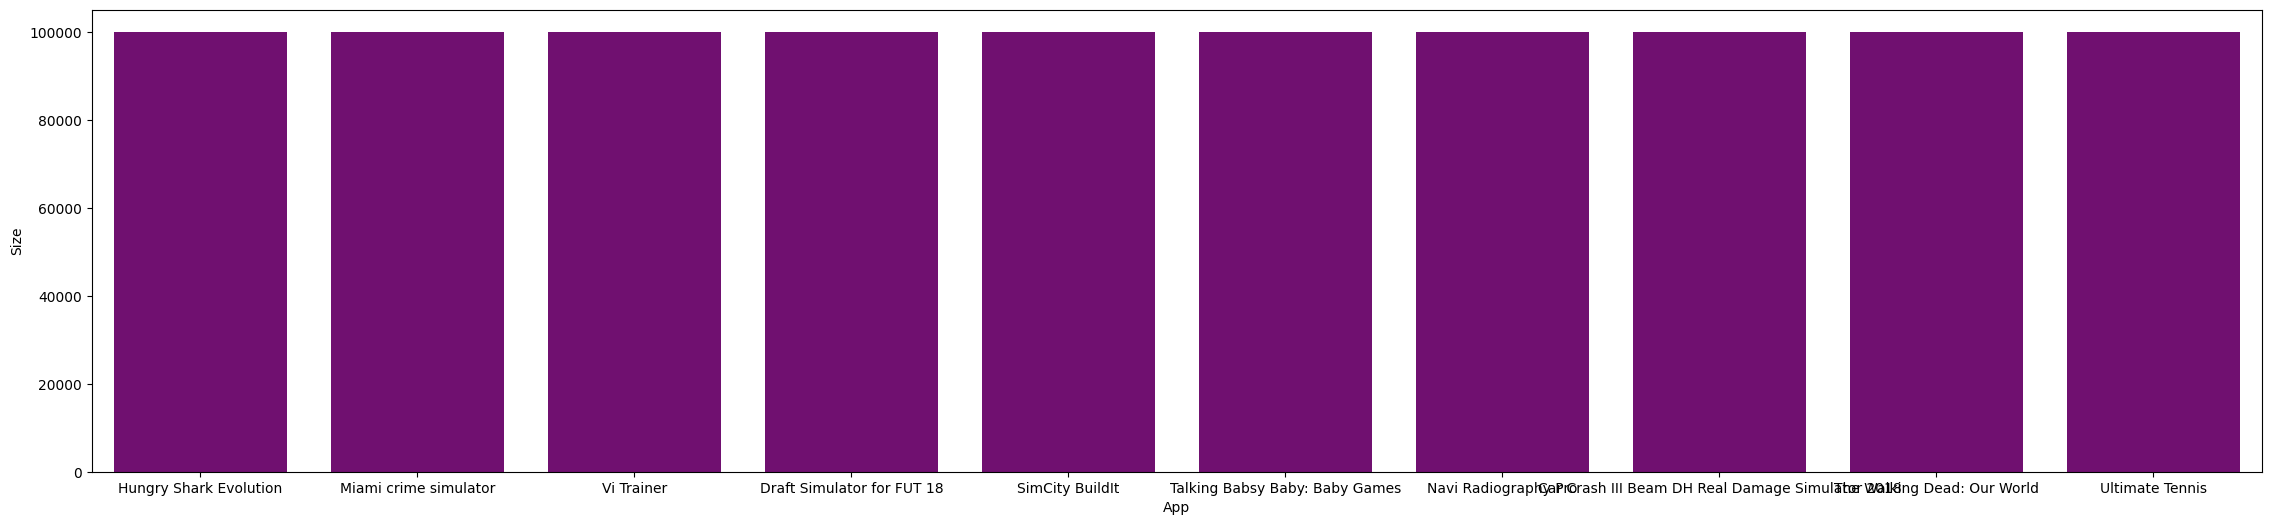

In [52]:
counts=df['Category'].value_counts()
counts.groupby(df['App'])
df_top_categories=counts.head(10)
print(df_top_categories)
plt.figure(figsize=(20,10))
plt.bar(df_top_categories.index,df_top_categories,color='green')
df.dropna(subset=['Size'], inplace=True)
top_apps2=df.sort_values(by='Size',ascending=False).head(10)
print(top_apps2)
plt.figure(figsize=(28,6))
sns.barplot(x=top_apps2['App'],y=top_apps2['Size'],color='purple')


In [ ]:
#Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

                                App            Category  Rating  Reviews  \
5489      AP Art History Flashcards              FAMILY     5.0        1   
4799    PewDiePie's Tuber Simulator              FAMILY     4.8  1499466   
1863                    Idle Heroes                GAME     4.7   416540   
7608   We Bare Bears Match3 Repairs              FAMILY     4.7    39153   
3582      Favorite children's songs           PARENTING     4.7       39   
2349               Teach Me Anatomy             MEDICAL     4.7     9945   
2299           Navi Radiography Pro             MEDICAL     4.7       11   
3586              Mozart Baby Sleep           PARENTING     4.7      107   
8748  The Walking Zombie: Dead City                GAME     4.6    58575   
1522               Chakra Cleansing  LIBRARIES_AND_DEMO     4.6      539   

          Size  Installs  Type  Price Content Rating            Genres  \
5489   96000.0        10  Paid     29     Mature 17+         Education   
4799   96000.0 

<Axes: xlabel='App', ylabel='Installs'>

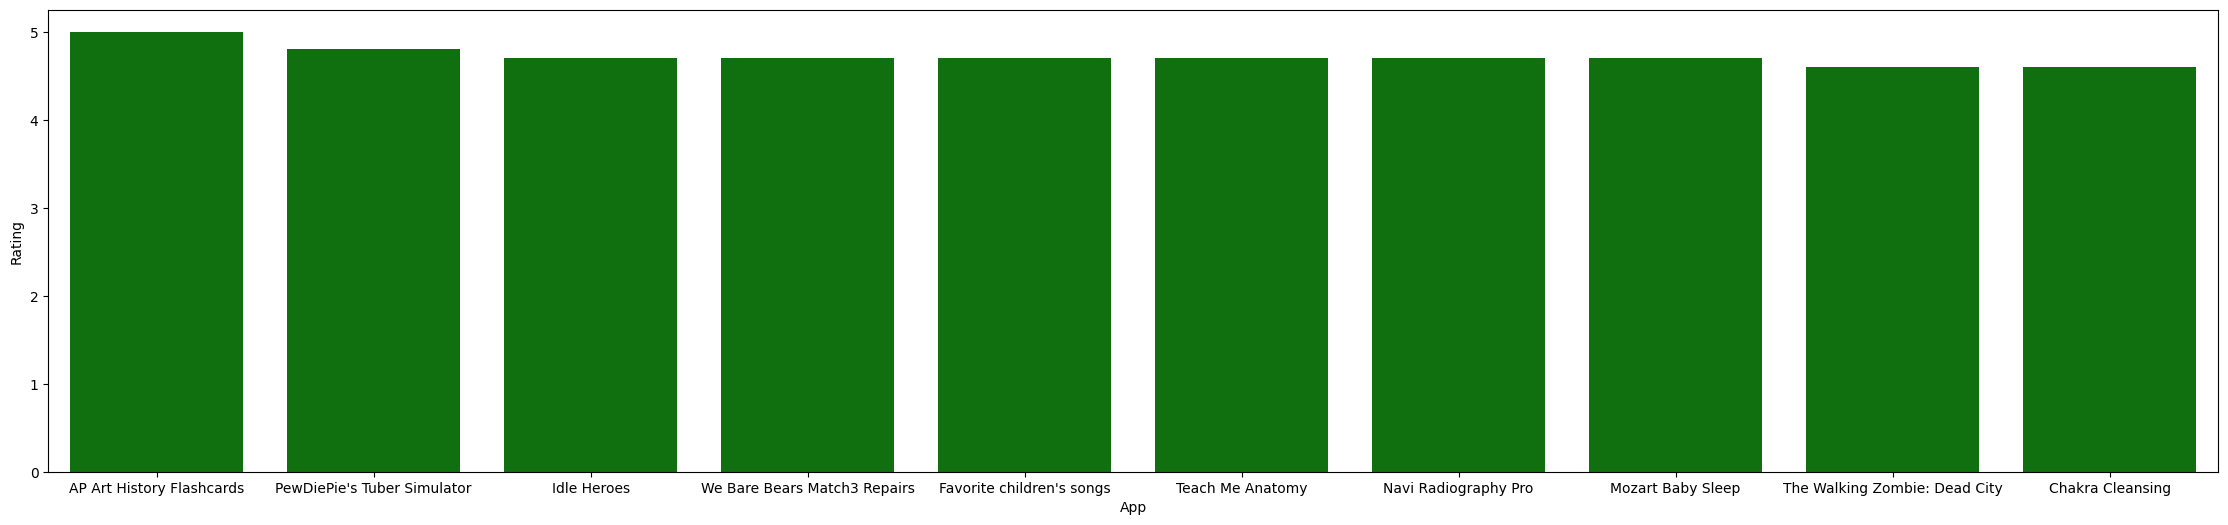

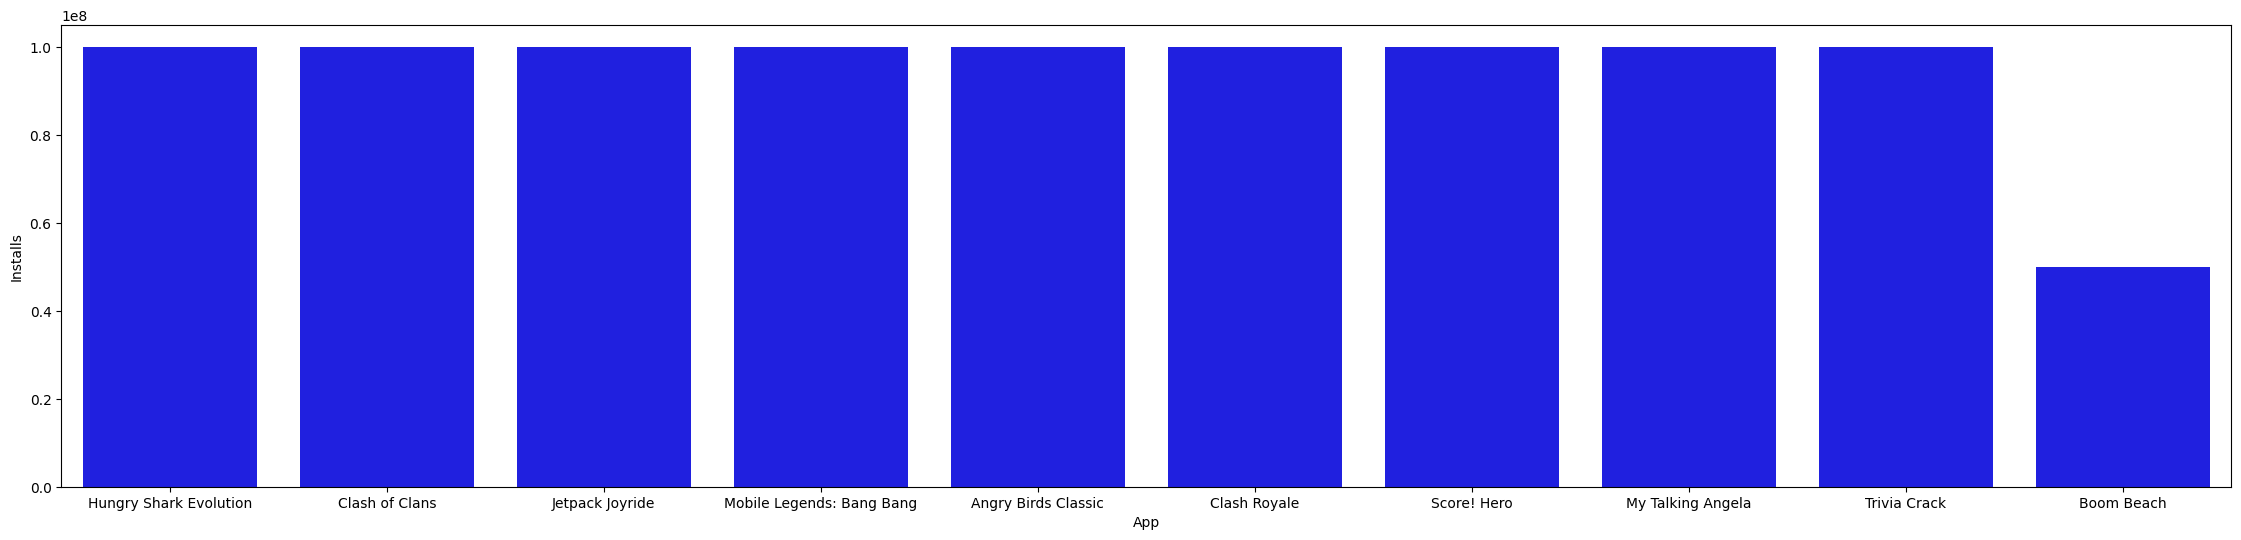

In [53]:
df.dropna(subset=['Rating'], inplace=True)
top_apps3=df.sort_values(by='Rating',ascending=False).head(10)
print(top_apps3)
plt.figure(figsize=(28,6))
sns.barplot(x=top_apps3['App'],y=top_apps3['Rating'],color='green')
df.dropna(subset=['Installs'], inplace=True)
top_apps4=df.sort_values(by='Installs',ascending=False).head(10)
print(top_apps4)
plt.figure(figsize=(28,6))
sns.barplot(x=top_apps4['App'],y=top_apps4['Installs'],color='blue')

In [ ]:
#Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

                            App Category  Rating   Reviews      Size  \
1758     Hungry Shark Evolution     GAME     4.5   6074334  100000.0   
1670             Clash of Clans     GAME     4.6  44891723   98000.0   
2007            Jetpack Joyride     GAME     4.4   4638163   96000.0   
5417  Mobile Legends: Bang Bang     GAME     4.4   8219586   99000.0   
1680        Angry Birds Classic     GAME     4.4   5566669   97000.0   
1660               Clash Royale     GAME     4.6  23133508   97000.0   
1709                Score! Hero     GAME     4.6   5418675   96000.0   
1697          My Talking Angela     GAME     4.5   9881829   99000.0   
1781               Trivia Crack     GAME     4.5   6427773   95000.0   
6551                 Boom Beach   FAMILY     4.5   5591653   95000.0   

       Installs  Type  Price Content Rating    Genres    Last Updated  \
1758  100000000  Free      0           Teen    Arcade   July 25, 2018   
1670  100000000  Free      0   Everyone 10+  Strategy   July 

Text(0.5, 1.0, 'Installations according to last update:')

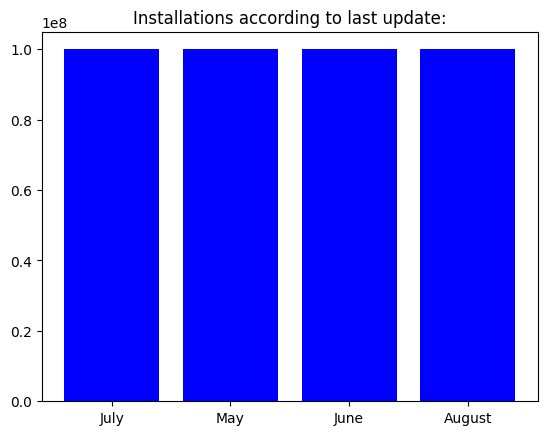

In [54]:
df['last_updated_month']=df['Last Updated'].str.split(' ').str[0]
df['last_updated_date']=df['Last Updated'].str.split(' ').str[1]
df['last_updated_year']=df['Last Updated'].str.split(',').str[1]
df['last_updated_date']=df['last_updated_date'].str.replace(',','')
df.head(5)
top_apps5=df.sort_values(by='Installs',ascending=False).head(10)
print(top_apps5)
plt.bar(top_apps5['last_updated_month'],top_apps5['Installs'],color='blue')
plt.title("Installations according to last update:")

                                App            Category  Rating  Reviews  \
5489      AP Art History Flashcards              FAMILY     5.0        1   
4799    PewDiePie's Tuber Simulator              FAMILY     4.8  1499466   
1863                    Idle Heroes                GAME     4.7   416540   
7608   We Bare Bears Match3 Repairs              FAMILY     4.7    39153   
3582      Favorite children's songs           PARENTING     4.7       39   
2349               Teach Me Anatomy             MEDICAL     4.7     9945   
2299           Navi Radiography Pro             MEDICAL     4.7       11   
3586              Mozart Baby Sleep           PARENTING     4.7      107   
8748  The Walking Zombie: Dead City                GAME     4.6    58575   
1522               Chakra Cleansing  LIBRARIES_AND_DEMO     4.6      539   

          Size  Installs  Type  Price Content Rating            Genres  \
5489   96000.0        10  Paid     29     Mature 17+         Education   
4799   96000.0 

Text(0.5, 1.0, 'Installations according to last updated dates')

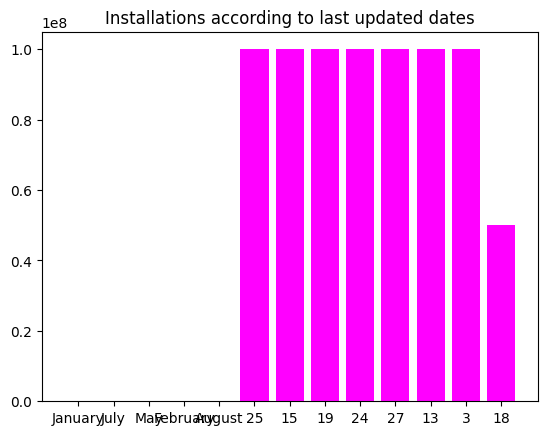

In [55]:
df.dropna(subset=['Rating'], inplace=True)
top_apps6=df.sort_values(by='Rating',ascending=False).head(10)
print(top_apps6)
plt.bar(top_apps6['last_updated_month'],top_apps6['Rating'],color='red')
plt.title("Ratings according to last updated months")
plt.bar(top_apps5['last_updated_date'],top_apps5['Installs'],color='magenta')
plt.title("Installations according to last updated dates")